# 4.9 Intro to data visualization with python

## 0.1 Importing data and libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r"C:\Users\quinn\PycharmProjects\Instacart Basket Analysis 06-30-2021"
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_derived_Grouped.pkl'))

In [3]:
ords_prods_merge.head().drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,_merge,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_order,Order_flag
0,196,Soda,77.0,7.0,9.0,2539329,1,1,2,8,...,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,High spender,20.5,Non-frequent customer
1,14084,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,2539329,1,1,2,8,...,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,High spender,20.5,Non-frequent customer
2,12427,Original Beef Jerky,23.0,19.0,4.4,2539329,1,1,2,8,...,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,High spender,20.5,Non-frequent customer
3,26088,Aged White Cheddar Popcorn,23.0,19.0,4.7,2539329,1,1,2,8,...,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,High spender,20.5,Non-frequent customer
4,26405,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,2539329,1,1,2,8,...,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,High spender,20.5,Non-frequent customer


## 0.2 Creating charts

### Bar chart or plot

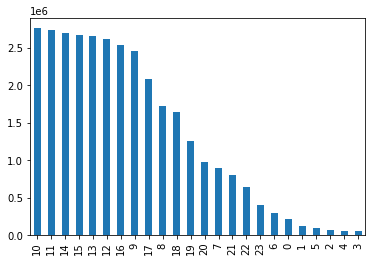

In [5]:
order_hour_of_day= ords_prods_merge['order_hour_of_day'].value_counts().plot.bar()

In [6]:
order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_hour_of_day.png'))

<AxesSubplot:>

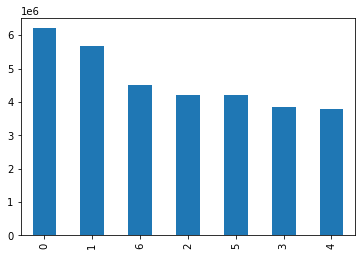

In [7]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

In [11]:
ords_prods_merge['orders_day_of_week'].value_counts(dropna=False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

<AxesSubplot:>

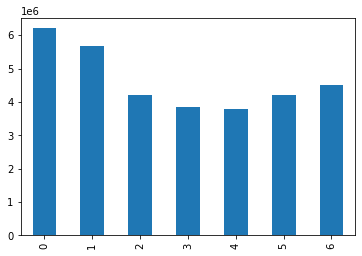

In [9]:
# to sort the chart
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [12]:
#It can be used for sorting frequencies as well
ords_prods_merge['orders_day_of_week'].value_counts(dropna=False).sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

<AxesSubplot:>

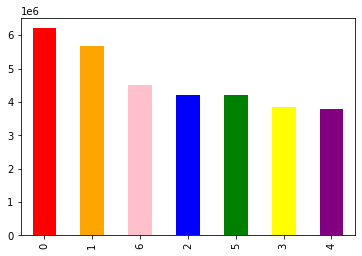

In [14]:
#Adding color to the chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['red', 'orange', 'pink', 'blue', 'green', 'yellow', 'purple'])

### Exporting charts

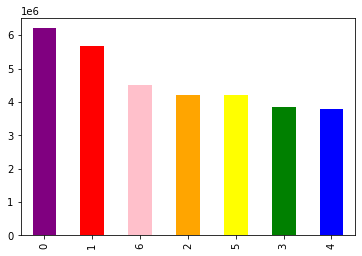

In [16]:
# saving it to bar
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

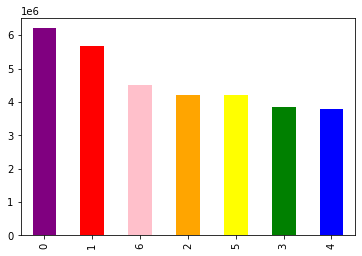

In [17]:
# calling on it with 
bar.figure

In [18]:
# saving the image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Creating a histogram and scatterplot

<AxesSubplot:ylabel='Frequency'>

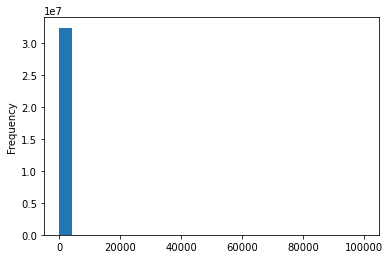

In [19]:
#Creating a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

Ther is a outlier of 99999 so it is messing with the histogram

<AxesSubplot:xlabel='prices', ylabel='prices'>

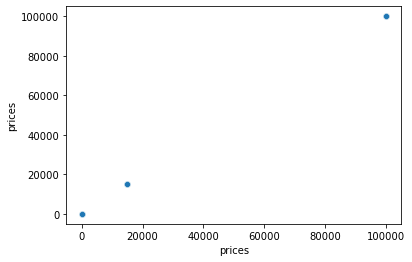

In [20]:
# how to creat a scatterplot and look for outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [7]:
# Looking for values abouve a certin threshold
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

MemoryError: Unable to allocate 1.69 GiB for an array with shape (7, 32404859) and data type float64

In [3]:
# going to mark them as missing
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [4]:
#Checking to see if it worked
ords_prods_merge['prices'].max()

25.0

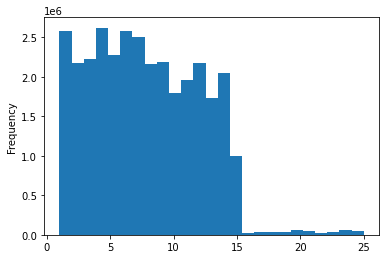

In [7]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

In [8]:
# saving the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

### Creating line charts

### Since we dont have any dates we will have to sample data

In [7]:
#creating a sample set
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

How can you use your list to split your dataframe into two samples? This will involve an elegant hack:

In [8]:
# store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [9]:
#Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [10]:
len(ords_prods_merge)

32404859

In [11]:
len(big)+len(small)

32404859

In [12]:
df_2 = small[['orders_day_of_week','prices']]

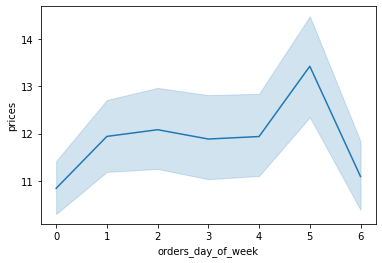

In [13]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [14]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_of_day.png'))

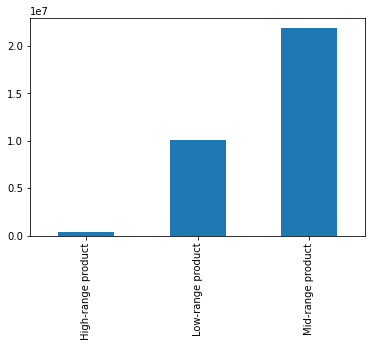

In [15]:
price_range_bar=ords_prods_merge['price_range_loc'].value_counts().sort_index().plot.bar()

In [16]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_of_day.png'))

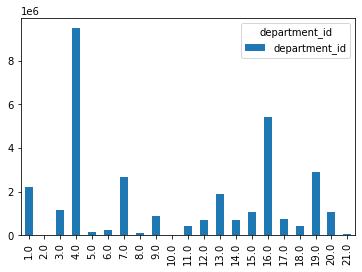

In [19]:
department_bar=ords_prods_merge['department_id'].value_counts().sort_index().plot.bar()
plt.legend(title='department_id')

In [20]:
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar.png'))